In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
#Loading training data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Loading test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Exploratory Data Analysis
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

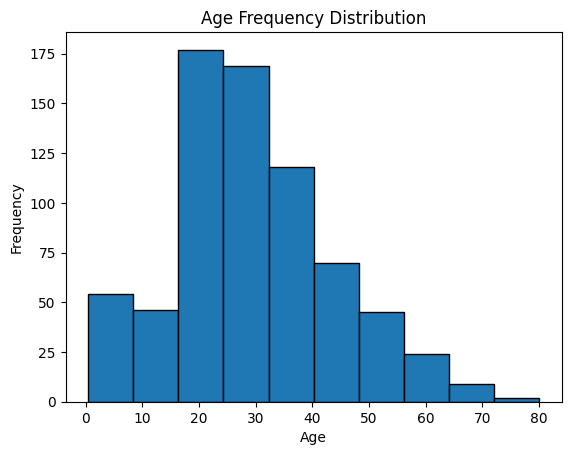

In [ ]:
import matplotlib.pyplot as plt


# Plotting the histogram
plt.hist(train_data['Age'], bins=10, edgecolor='black')

# Customizing the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')

# Display the plot
plt.show()


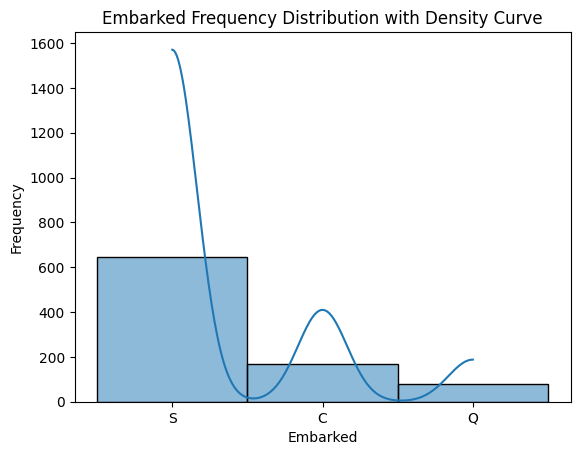

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram with density curve
sns.histplot(train_data['Embarked'], kde=True)

# Customizing the plot
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.title('Embarked Frequency Distribution with Density Curve')

# Display the plot
plt.show()


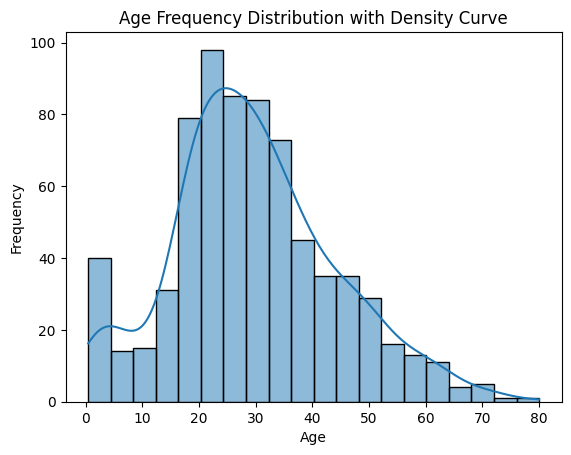

In [ ]:
import seaborn as sns


# Plotting the histogram with density curve
sns.histplot(train_data['Age'], kde=True)

# Customizing the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution with Density Curve')

# Display the plot
plt.show()


In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)
print("% of women who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of women who survived: 0.18890814558058924


In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


y = train_data["Survived"]

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = pd.get_dummies(train_data[features])


In [ ]:
# Assuming your DataFrame is named 'df'
nan_counts = X.isna().sum()

print(nan_counts)

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer

# Instantiate the imputer with k=5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Fill missing values in the 'Age' column using KNN imputation
X['Age'] = imputer.fit_transform(X[['Age']])

# Verify the imputed data
nan_counts = X.isna().sum()
print(nan_counts)


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [ ]:
# Splitting the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_test = pd.get_dummies(test_data[features])

# Assuming your DataFrame is named 'df'
nan_counts = X_test.isna().sum()

print(nan_counts)

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [ ]:
# Calculate the median fare value
median_fare = X_test['Fare'].median()

# Fill the missing values in the 'Fare' column with the median value
X_test['Fare'].fillna(median_fare, inplace=True)

# Verify the imputed data
print(X_test.isna().sum())

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer

# Instantiate the imputer with k=5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Fill missing values in the 'Age' column using KNN imputation
X_test['Age'] = imputer.fit_transform(X_test[['Age']])

# Verify the imputed data
nan_counts = X_test.isna().sum()
print(nan_counts)


Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [ ]:
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled =scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train_scaled, y_train)
val_predictions = model.predict(X_val_scaled)

In [ ]:
# Accessing feature importances
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.13921137 0.10639287 0.05043461 0.03433208 0.12205803 0.25754774
 0.25434459 0.01028461 0.00939402 0.01600008]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, val_predictions)
print("Random_Accuracy:", accuracy)

Random_Accuracy: 0.7653631284916201


In [ ]:
predictions = model.predict(X_test_scaled)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 8]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
best_rf_params = grid_search.best_params_
print("best_rf_params:", best_rf_params)
best_rf_model = grid_search.best_estimator_

# Use the best model to make predictions on the validation set
rf_val_predictions = best_rf_model.predict(X_val_scaled)

# Calculate the accuracy of the best model on the validation set
rf_accuracy = accuracy_score(y_val, rf_val_predictions)
print("Accuracy:", rf_accuracy)


best_rf_params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.776536312849162


In [ ]:
#Logistic regression and Decision tree classifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled =scaler.transform(X_test)


# Logistic Regression
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
logistic_val_predictions = logistic_model.predict(X_val_scaled)

# Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
tree_val_predictions = tree_model.predict(X_val_scaled)


In [ ]:

# Accessing the coefficients and intercept
coefficients = logistic_model.coef_
intercept = logistic_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[-1.01819353 -0.53757467 -0.34788834  0.02505837  0.00788748  0.64324432
  -0.64324432 -0.08687442 -0.035371   -0.27608296]]
Intercept: [-0.69341024]


In [ ]:
from sklearn.metrics import accuracy_score

Log_accuracy = accuracy_score(y_val, logistic_val_predictions)
print("Logistic Accuracy:", Log_accuracy)

Tree_accuracy = accuracy_score(y_val, tree_val_predictions)
print("Decision Tree Accuracy:", Tree_accuracy)

Logistic Accuracy: 0.8044692737430168
Decision Tree Accuracy: 0.7541899441340782


In [ ]:
log_predictions = logistic_model.predict(X_test_scaled)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': log_predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
log_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

# Create the grid search object
log_grid_search = GridSearchCV(estimator=LogisticRegression(random_state=1),
                           param_grid=log_param_grid,
                           scoring='roc_auc',
                           cv=5)

# Fit the grid search to the scaled training data
log_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
log_best_params = log_grid_search.best_params_
log_best_model = log_grid_search.best_estimator_

# Use the best model to make predictions on the validation set
log_val_predictions = log_best_model.predict(X_val_scaled)

# Calculate the accuracy of the best model on the validation set
log_accuracy = accuracy_score(y_val, log_val_predictions)
print("Accuracy:", log_accuracy)


Accuracy: 0.8044692737430168


In [ ]:
print("log_best_params:", log_best_params)

log_best_params: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
tree_param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
                           param_grid=tree_param_grid,
                           scoring='roc_auc',
                           cv=5)

# Fit the grid search to the scaled training data
tree_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
tree_best_params = tree_grid_search.best_params_
tree_best_model = tree_grid_search.best_estimator_

# Use the best model to make predictions on the validation set
tree_val_predictions = tree_best_model.predict(X_val_scaled)

# Calculate the accuracy of the best model on the validation set
tree_accuracy = accuracy_score(y_val, tree_val_predictions)
print("Accuracy:", tree_accuracy)


Accuracy: 0.8044692737430168


In [ ]:
print("tree_best_params:", tree_best_params)

log_best_params: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
from xgboost import XGBClassifier
from sklearn.svm import SVC

# XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_val_predictions = xgb_model.predict(X_val_scaled)
xgb_accuracy = accuracy_score(y_val, xgb_val_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# SVM Classifier
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_val_predictions = svm_model.predict(X_val_scaled)
svm_accuracy = accuracy_score(y_val, svm_val_predictions)
print("SVM Accuracy:", svm_accuracy)


XGBoost Accuracy: 0.7821229050279329
SVM Accuracy: 0.776536312849162


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
XGB_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the grid search object
XGB_grid_search = GridSearchCV(estimator=XGBClassifier(random_state=1),
                           param_grid=XGB_param_grid,
                           scoring='roc_auc',
                           cv=5)

# Fit the grid search to the scaled training data
XGB_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
XGB_best_params = XGB_grid_search.best_params_
XGB_best_model = XGB_grid_search.best_estimator_

# Use the best model to make predictions on the validation set
XGB_val_predictions = XGB_best_model.predict(X_val_scaled)

# Calculate the accuracy of the best model on the validation set
XGB_accuracy = accuracy_score(y_val, XGB_val_predictions)
print("Accuracy:", XGB_accuracy)


Accuracy: 0.8100558659217877


In [ ]:
print("XGB_best_params:", XGB_best_params)

XGB_best_params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
SVC_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create the grid search object
SVC_grid_search = GridSearchCV(estimator=SVC(random_state=1),
                           param_grid=SVC_param_grid,
                           scoring='roc_auc',
                           cv=5)

# Fit the grid search to the scaled training data
SVC_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and the corresponding model
SVC_best_params = SVC_grid_search.best_params_
SVC_best_model = SVC_grid_search.best_estimator_

# Use the best model to make predictions on the validation set
SVC_val_predictions = SVC_best_model.predict(X_val_scaled)

# Calculate the accuracy of the best model on the validation set
SVC_accuracy = accuracy_score(y_val, val_predictions)
print("Accuracy:", SVC_accuracy)


Accuracy: 0.776536312849162


In [ ]:
print("SVC_best_params:", SVC_best_params)

SVC_best_params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.ensemble import VotingClassifier
# Create the ensemble model by combining the individual models
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', model),
        ('logistic', logistic_model),
        ('tree', tree_model),
        ('svm', svm_model),
        ('xgb', xgb_model)
    ],
    voting='hard'  # You can also try 'soft' voting for probability-based predictions
)

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predict on the validation set
ensemble_val_predictions = ensemble_model.predict(X_val_scaled)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_val, ensemble_val_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.7877094972067039


In [ ]:
from sklearn.ensemble import VotingClassifier
# Create the ensemble model by combining the individual models
ensemble_model = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('logistic', log_best_model),
        ('tree',tree_best_model ),
        ('svm', SVC_best_model),
        ('xgb', XGB_best_model)
    ],
    voting='hard'  # You can also try 'soft' voting for probability-based predictions
)

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predict on the validation set
ensemble_val_predictions = ensemble_model.predict(X_val_scaled)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_val, ensemble_val_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.776536312849162
